In [90]:
%matplotlib inline
from matplotlib.pyplot import imshow
from PIL import Image, ImageFilter
import numpy as np
import skimage.color as sc

(601, 539, 3)

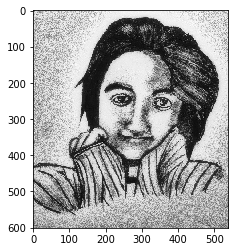

In [91]:
i=np.array(Image.open('C:\\Users\\Abhinav Raj\\Downloads\\10928645_672806466163524_738060237_n.jpg'))
imshow(i)
i.shape

In [92]:
print(type(i))

<class 'numpy.ndarray'>


(601, 539)

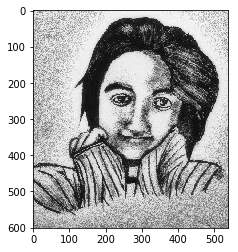

In [93]:
i_mono=sc.rgb2gray(i)
imshow(i_mono,cmap='gray')
i_mono.shape

# Pixel Distribution

In [94]:
def im_hist(img):
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(8,6))
    fig.clf()
    ax=fig.gca()
    ax.hist(img.flatten(),bins=256)
    plt.show

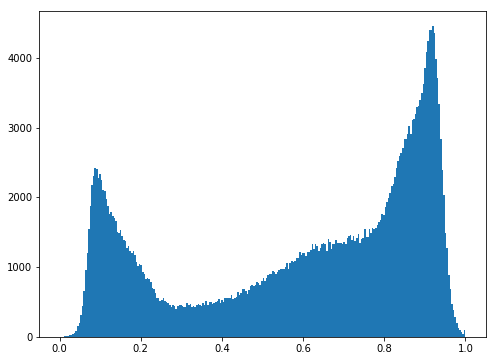

In [95]:
im_hist(i_mono)

In [96]:
def im_cdf(img):
    import matplotlib.pyplot as plt
    fig=plt.figure(figsize=(8,6))
    fig.clf()
    ax=fig.gca()
    ax.hist(img.flatten(),bins=256,cumulative=True)
    plt.show()

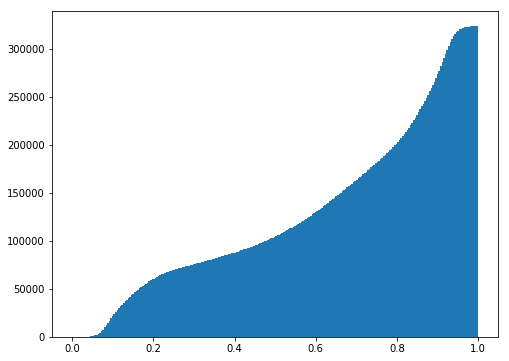

In [97]:
im_cdf(i_mono)

# Equalize the Image

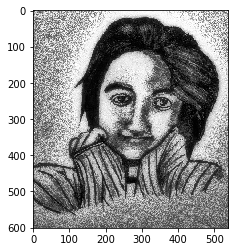

In [98]:
from skimage import exposure

i_eq=exposure.equalize_hist(i_mono)
imshow(i_eq,cmap='gray')

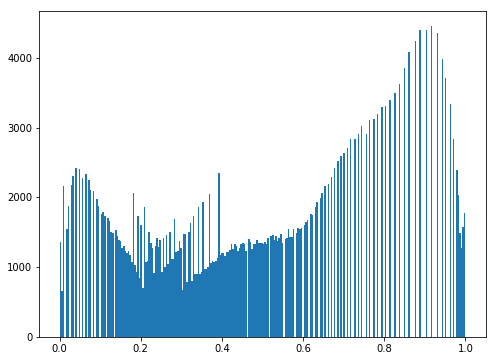

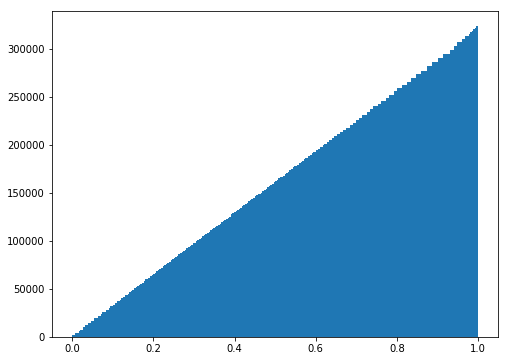

In [99]:
im_hist(i_eq)
im_cdf(i_eq)

# Filters

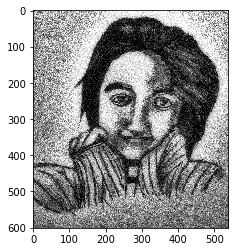

In [100]:
import skimage
i_n=skimage.util.random_noise(i_eq)
imshow(i_n,cmap='gray')

### Gaussian Filter

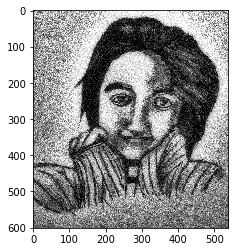

In [101]:
def gauss_filter(im,sigma=10):
    from scipy.ndimage.filters import gaussian_filter as gf
    import numpy as np
    return gf(im,sigma=sigma)
i_g=gauss_filter(i_n)
imshow(i_n,cmap='gray')

### Median Filter

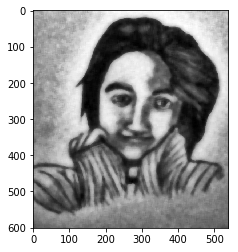

In [102]:
def med_filter(im,size=10):
    from scipy.ndimage.filters import median_filter as mf
    import numpy as np
    return mf(im,size=size)

i_m=med_filter(i_n)
imshow(i_m,cmap='gray')

# Edge Detection

### Gradient Method

In [103]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image=sc.rgb2gray(image)
    dx=ndimage.sobel(image,1) #horizontal derivative
    dy=ndimage.sobel(image,0) #vertical derivative
    mag=np.hypot(dx,dy)
    mag *= 255.0 / np.amax(mag)
    mag =mag.astype(np.uint8)
    return mag

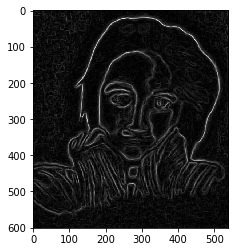

In [104]:
i_edge=edge_sobel(i_m)
imshow(i_edge,cmap='gray')

### Harris Corner Detection

In [106]:
def corner_harr(im,min_distance=10):
    from skimage.feature import corner_harris,corner_peaks
    mag=corner_harris(im)
    return corner_peaks(mag,min_distance=min_distance)

In [109]:
harris=corner_harr(i_eq,10)

In [86]:
def plot_harris(im,harris,markersize=20,color='red'):
    import matplotlib.pyplot as plt
    import numpy as np
    fig=plt.figure(figsize=(6,6))
    fig.clf()
    ax=fig.gca()
    ax.imshow(np.array(im).astype(float),cmap='gray')
    ax.plot(harris[:,1],harris[:,0],'r+',color=color,markersize=markersize)
    return 'Done'

'Done'

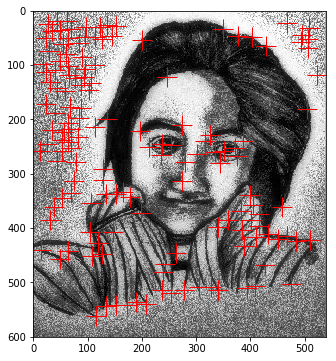

In [87]:
plot_harris(i_eq,harris)